In [1]:
# 라이브러리 추가
import urllib.request
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 네이버 데이터랩 API
client_id = "89L30Y3xCshEctCoab1v"
client_secret = "aIoL3WXAsj"

url = "https://openapi.naver.com/v1/datalab/search"
    
body = {
    "startDate":"2018-12-01",
    "endDate":"2019-11-30",
    "timeUnit":"date",
    "keywordGroups":[
        {"groupName":"국립공원","keywords":["국립공원"]},
    ],
}
body = json.dumps(body)
    
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id", client_id)
request.add_header("X-Naver-Client-Secret", client_secret)
request.add_header("Content-Type","application/json")
response = urllib.request.urlopen(request, data=body.encode("utf-8"))
json_obj = json.loads(response.read().decode('utf-8'))

# 데이터프레임
df = pd.DataFrame(json_obj['results'][0]['data'])
df.columns=['기간', '국립공원']; df.index = pd.to_datetime(df['기간'])
df

,기간,국립공원
기간,,
2018-12-01,2018-12-01,15.66645
2018-12-02,2018-12-02,17.94061
2018-12-03,2018-12-03,29.87997
2018-12-04,2018-12-04,24.13139
2018-12-05,2018-12-05,22.48894
2018-12-06,2018-12-06,22.42577
2018-12-07,2018-12-07,26.78458
2018-12-08,2018-12-08,18.88818
2018-12-09,2018-12-09,18.63550


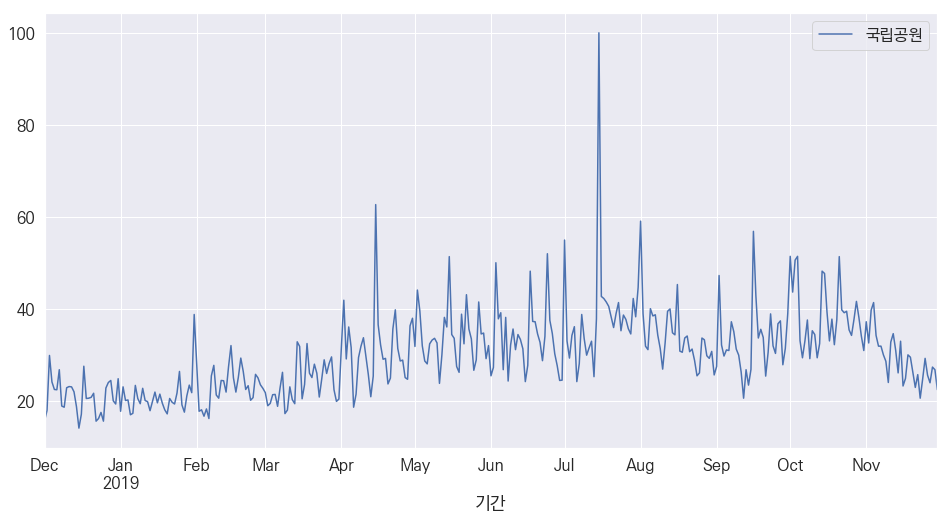

In [3]:
# 국립공원 검색량 상대값 플롯
sns.set(style='darkgrid', font='KoPubDotum', font_scale=1.5)
df.plot(figsize=(16, 8), y="국립공원")
plt.savefig('D:/GEODATA/IMG01.png', bbox_inches='tight')

In [4]:
df.loc[df['국립공원'] == 100]

,기간,국립공원
기간,,
2019-07-15,2019-07-15,100.0


In [5]:
# 상대치(relative values): 201812-201911
rv = df.groupby(by=[df.index.year, df.index.month]).sum().astype(int)
rv.rename({'국립공원': '상대치'}, axis=1, inplace=True)
rv

상대치
기간   기간      
2018 12   649
2019 1    646
     2    652
     3    736
     4    933
     5   1048
     6   1002
     7   1198
     8   1051
     9    988
     10  1188
     11   872

In [6]:
# 절대치(absolute values): 201812-201911
av = [10380, 10310, 10410, 11740, 14890, 16710, 16310, 19430, 16980, 16020, 19260, 14140]
rv['절대치'] = av
rv

상대치    절대치
기간   기간             
2018 12   649  10380
2019 1    646  10310
     2    652  10410
     3    736  11740
     4    933  14890
     5   1048  16710
     6   1002  16310
     7   1198  19430
     8   1051  16980
     9    988  16020
     10  1188  19260
     11   872  14140

In [13]:
# 선형 최소제곱법을 이용한 예측치 계산
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(rv['상대치'],rv['절대치'])

rv['예측치'] = (rv['상대치'] * slope).astype(int)
rv

상대치    절대치    예측치
기간   기간                    
2018 12   649  10380  10687
2019 1    646  10310  10637
     2    652  10410  10736
     3    736  11740  12119
     4    933  14890  15364
     5   1048  16710  17257
     6   1002  16310  16500
     7   1198  19430  19727
     8   1051  16980  17307
     9    988  16020  16269
     10  1188  19260  19563
     11   872  14140  14359

In [14]:
rv.to_excel('D:/GEODATA/RV.xlsx')

In [15]:
rv['절대치'].sum()

176580

In [16]:
rv['예측치'].sum()

180525

In [17]:
rv['절대치'].sum() - rv['예측치'].sum()

-3945

In [18]:
print('%.4f' % r_value)

0.9995


In [19]:
print('%.4f' % p_value)

0.0000


In [20]:
print(slope, intercept)

16.46731479457243 -329.2643410747969


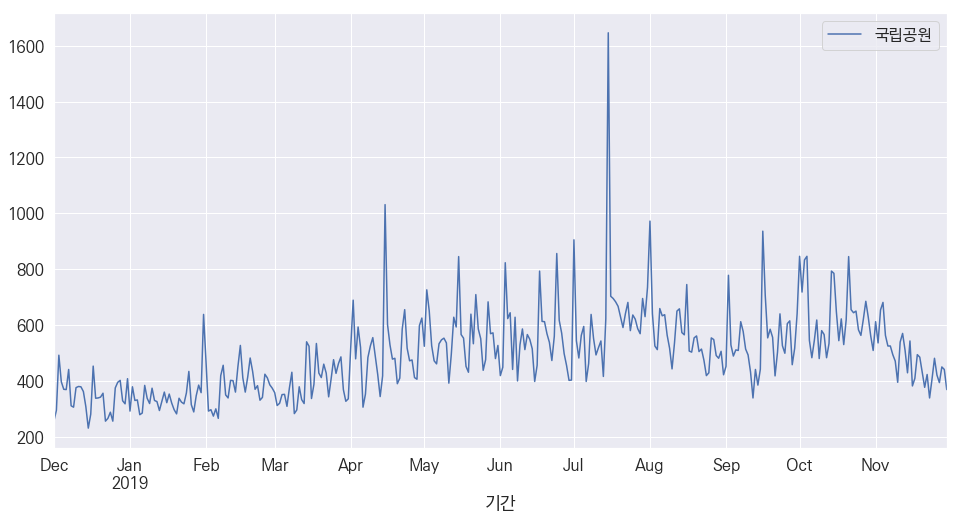

In [21]:
# 국립공원 검색량 상대값 플롯
df['국립공원'] = (df['국립공원'] * slope).astype(int)
df.plot(figsize=(16, 8), y="국립공원")
plt.savefig('D:/GEODATA/IMG02.png', bbox_inches='tight')

In [23]:
df.loc[df.index == '2019-07-15']

,기간,국립공원
기간,,
2019-07-15,2019-07-15,1646


In [25]:
df['국립공원'].sum() - 176580

3850